### Homework

Before you begin, remember to import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

The Marketing and Product teams are studying a new bundle-offer that they want to test in the checkout funnel of the e-commerce platform. In particular, once the user adds something to the cart, they will see an additional screen showing a special offer on a related product if they add it to the cart and purchase them together. 

To be sure that this is a good idea, they conducted an AB test and, after the fact, they call you in to analyse the results, to verify whether the increased conversion rate is statistically significant. 

1. The test results are in the `data/ab-test-homework.csv` csv file. Import them, familiarise yourself with the data and perform a permutation test to assess wether the treatment's higher conversion rate is statistically significant (note: control group = 'GRP A'; treatment group = 'GRP B'). 
2. Are you satisfied with the results? If you would have been consulted before the test, would you have done things differently?

***

In [3]:
df_raw = pd.read_csv('data/ab-test-homework.csv')

In [4]:
df_raw.head()

,idUser,dtPurchased,nmGroup,isConv
0,70893691,2017-08-02,GRP A,0
1,42506632,2017-08-21,GRP A,0
2,42520540,2017-09-30,GRP A,0
3,62816375,2017-05-31,GRP A,0
4,62801089,2017-06-28,GRP A,0


In [5]:
df = df_raw.copy()
df['dtPurchased'] = pd.to_datetime(df['dtPurchased'])
df.head()

,idUser,dtPurchased,nmGroup,isConv
0,70893691,2017-08-02,GRP A,0
1,42506632,2017-08-21,GRP A,0
2,42520540,2017-09-30,GRP A,0
3,62816375,2017-05-31,GRP A,0
4,62801089,2017-06-28,GRP A,0


In [5]:
df = df.rename(columns={'idUser' : 'User', 'dtPurchased': 'date', 'nmGroup':'group', 'isConv':'conv'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   User    6177 non-null   int64         
 1   date    6177 non-null   datetime64[ns]
 2   group   6177 non-null   object        
 3   conv    6177 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 193.2+ KB


In [6]:
df.groupby(['group', 'conv'], as_index=False).size()

,group,conv,size
0,GRP A,0,2218
1,GRP A,1,811
2,GRP B,0,2233
3,GRP B,1,915


In [7]:
#df = df[(df.group=='GRP A')&(df.page=='old_cart') | (df.group=='treatment')&(df.page=='new_cart')]
df.User.value_counts()

70893691    1
30944296    1
32118237    1
32080317    1
32042734    1
           ..
99857591    1
12494732    1
70503348    1
14206540    1
99995092    1
Name: User, Length: 6177, dtype: int64

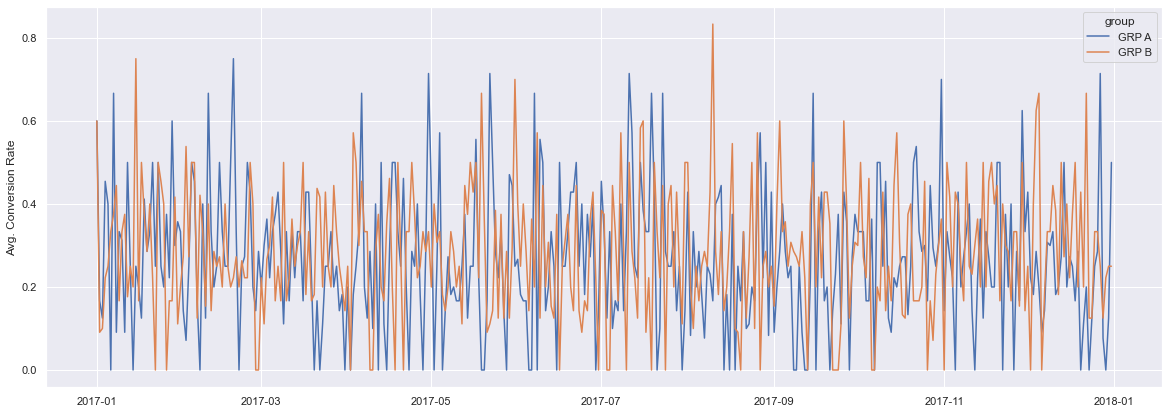

In [8]:
fig, ax = plt.subplots(figsize=(20, 7))
p = sns.lineplot(x='date', y='conv', hue='group', data=df, ci=None)
p.set_xlabel('')
p.set_ylabel('Avg. Conversion Rate')
plt.show()

In [67]:
df.groupby('group', as_index=False).agg({'conv': ['count', 'sum', np.mean]})

group  conv               
         count  sum      mean
0  GRP A  3029  811  0.267745
1  GRP B  3148  915  0.290661

In [1]:
a_control = np.mean(df[df.group=='GRP A']['conv'])
b_treatment = np.mean(df[df.group=='GRP B']['conv'])
ab_diff = b_treatment - a_control
print('Observed test statistic:', ab_diff)

NameError: name 'np' is not defined

In [19]:
n = 700
ab_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    a_control = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(a_control.index)
    # create dataframe with other 50% of data
    b_treatment = df.loc[list(ix2)]
    # calculate difference in mean from each sample
    ab_diff_temp = np.mean(a_control['conv']) - np.mean(b_treatment['conv'])
    # append sampled mean difference to mu_diff_samples list
    ab_diff_samples.append(ab_diff_temp)

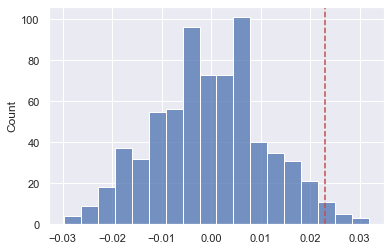

Avgerage Simulated Test Statistic: -0.0003
Initially Observed Test Statistic: 0.0229


In [21]:
hist = sns.histplot(ab_diff_samples)
plt.axvline(ab_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(ab_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{ab_diff:.4f}')

In [22]:
print('Results more extreme than observed:', sum([el >= ab_diff for el in ab_diff_samples]))
print('Total results:', len(ab_diff_samples))
p_value = sum([el > ab_diff for el in ab_diff_samples])/n
print('p-value:', sum([el >= ab_diff for el in ab_diff_samples]), '/', len(ab_diff_samples), '=', p_value)

Results more extreme than observed: 13
Total results: 700
p-value: 13 / 700 = 0.018571428571428572


In [23]:
alpha = 0.1

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha
